
# CNN을 이용하여, CIFAR-10 이미지 분류하기


# STEP 0: 데이터셋 설명

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: 환결 설정 및 라이브러리 임포트

### 구글 드라이브 연결하여, 워킹 디렉토리 설정

[연결 방법 링크](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)

### 라이브러리 임포트 하고, 데이터 셋 가져오기  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# STEP #2: 이미지 Visualizing 해보자

In [6]:
X_train.shape

(50000, 32, 32, 3)

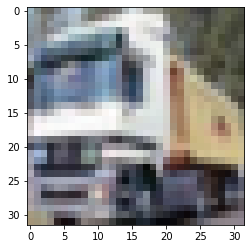

In [10]:
plt.imshow( X_train[1] )
plt.show()

In [11]:
y_train[1]

array([9], dtype=uint8)

# STEP #3: DATA 준비

In [14]:
X_train = X_train / 255.0

In [15]:
X_test = X_test / 255.0

### 이 딥러닝의 결과는, 총 10개의 결과로 분류하는 문제이므로, y_train 과 y_test 의 값을 원핫인코딩으로 바꾸시오. 

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train, 10)

In [22]:
y_test = to_categorical(y_test, 10)

### 피처스케일링 하시오.

# STEP #4: 모델링 및 학습시키기

### Data Augmentation 을 통한, 모델 Improving

- 원래 주어진 이미지를 통해, 이를 변형하여서 학습을 시키면 정확도가 증가한다. 
- 다음처럼 flipping, enlarging, rotating 을 통해서 원래의 이미지를 변형하여 학습시킨다.
- 또한 이미지를 이동시키거나 밝기 조정도 데이터 증강에 해당된다.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



In [28]:
def build_model() :
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
  model.add( MaxPooling2D( (2,2)  ) )
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add( MaxPooling2D( (2,2)  ) )

  model.add( Flatten() )
  model.add( Dropout(0.4) )
  model.add( Dense(128, 'relu') )
  model.add( Dense(10, 'softmax') )
  model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])
  return model

### 옵티마이저는 RMSprop로 컴파일 하고, 학습을 진행하시오. 학습 결과는 저장하시오.

[옵티마이저 종류](https://vision-ai.tistory.com/entry/%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-Optimizer-%EC%A2%85%EB%A5%98)

In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2304)             

In [31]:
epoch_history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4899 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1613 - accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0477 - accuracy: 0.6337
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9755 - accuracy: 0.6608
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9194 - accuracy: 0.6814
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8745 - accuracy: 0.6981
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8415 - accuracy: 0.7111
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8084 - accuracy: 0.7208
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7831 - accuracy: 0.7299
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.76

# STEP #5: 모델 평가

### 테스트셋을 통해서, 정확도를 구해보자

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8323 - accuracy: 0.7274


[0.8323127031326294, 0.727400004863739]

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen = ImageDataGenerator( width_shift_range=0.2, height_shift_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

In [39]:
train_generator = train_datagen.flow(X_train, y_train)

In [40]:
model = build_model()

In [41]:
model.fit(train_generator , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7431 - accuracy: 0.3632
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4902 - accuracy: 0.4635
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3959 - accuracy: 0.5010
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3357 - accuracy: 0.5243
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3039 - accuracy: 0.5387
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2816 - accuracy: 0.5474
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2673 - accuracy: 0.5564
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2587 - accuracy: 0.5590
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2490 - accuracy: 0.5644
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9953 - accuracy: 0.6555


[0.9952670931816101, 0.6554999947547913]

### 테스트셋으로 예측한 결과를 가져오시오. 그리고 첫번째 이미지에 대한 결과값을 확인하시오.

In [44]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
y_pred.shape

(10000, 10)

In [49]:
y_pred[0].argmax()

3

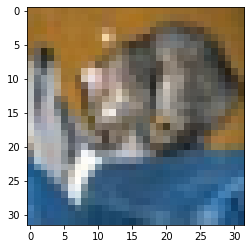

In [50]:
plt.imshow(X_test[0])
plt.show()

In [52]:
y_test[0].argmax()

3

### y_pred 에서, 각각 가장 큰 값들의 인덱스만 가져오시오. 그러면 그 인덱스를 통해서, 10가지 중에 무엇인지 확인이 가능합니다.

In [58]:
y_pred = y_pred.argmax(axis = 1)

### 실제 값들(ground truth) y_test 에서도, 가장 큰 값들의 인덱스만 가져오시오. 그러면 두개를 비교할 수 있습니다.

In [61]:
y_test = y_test.argmax(axis = 1)

### 컨퓨전 매트릭스를 확인하시오. 그리고 seaborn 의 히트맵으로 시각화 하시오.

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [64]:
cm = confusion_matrix(y_test, y_pred)

In [65]:
cm

array([[728,  26,  17,  30,   7,  24,   5,  33,  42,  88],
       [  6, 739,   1,   8,   2,  10,   5,  11,   4, 214],
       [ 85,  13, 329, 111,  53, 177, 107,  95,  10,  20],
       [ 14,  10,  14, 464,  16, 320,  64,  64,   7,  27],
       [ 25,   2,  29,  83, 422,  87, 107, 223,  14,   8],
       [  9,   4,  14, 121,  16, 736,  19,  63,   1,  17],
       [  5,   5,  14,  83,  15,  63, 762,  34,   4,  15],
       [ 10,   1,   2,  37,  10, 101,  10, 804,   2,  23],
       [ 92,  47,   2,  28,   5,  19,   3,  15, 680, 109],
       [ 15,  44,   1,  13,   1,   9,   1,  17,   8, 891]])

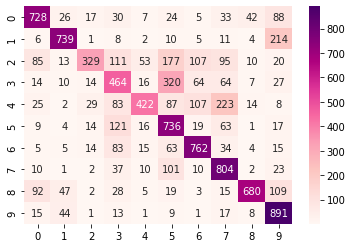

In [66]:
sb.heatmap(cm , annot=True, fmt='.0f', cmap='RdPu')
plt.show()

# STEP #6: 모델 저장하기

In [67]:
model.save('cifa10_model.h5')